<h1><center>DL2 to IRFs extra content</center></h1>

In this notebook we show how to  
 - create IRF from MC dl2 data using `lstchain` tools,
 - create a plot comparing sensitivity curves using `lstmcpipe`.

These examples are part of the `IRF production from MC & performance evaluation` session by Thomvas Vuillaume & Enrique Garcia on the 19th Jan 2022.

https://indico.cta-observatory.org/event/3687/contributions/31935/

# Creating IRFs from MC data

In [1]:
# Load data
from pathlib import Path

repo_data_dir = Path('../data').resolve().absolute()

dl2_gamma_file = Path.joinpath(repo_data_dir, 'mc/DL2/gamma/dl2_gamma_testing.h5')
dl2_gamma_diffuse_file = Path.joinpath(repo_data_dir, 'mc/DL2/gamma-diffuse/dl2_gamma-diffuse_testing.h5')
dl2_electron_file = Path.joinpath(repo_data_dir, 'mc/DL2/electron/dl2_electron_testing.h5')
dl2_proton_file = Path.joinpath(repo_data_dir, 'mc/DL2/proton/dl2_proton_testing.h5')


In [ ]:
# Check that data is present locally

for file in [dl2_gamma_file, dl2_gamma_diffuse_file, dl2_electron_file, dl2_proton_file]:
    if not file.exists():
        print(f'{file} does not exists.\n'\
            'Please run the ../DL1b_to_DL2.ipynb notebook to create it')

In [ ]:
# Create the IRFs using the lstchain entry points 
#  This commands are the same used inside lstMCpipe

IRF_gamma_diffuse = Path.joinpath(repo_data_dir, 'mc/IRF/irf_gamma_diffuse.fits.gz')

!lstchain_create_irf_files -g $dl2_gamma_diffuse_file -e $dl2_electron_file \
  -p $dl2_proton_file -o $IRF_gamma_diffuse --overwrite

In [ ]:
# And the point-like IRF

IRF_gamma = Path.joinpath(repo_data_dir, 'mc/IRF/irf_gamma_point-like.fits.gz')

!lstchain_create_irf_files --point-like -g $dl2_gamma_file -e $dl2_electron_file \
  -p $dl2_proton_file -o $IRF_gamma --overwrite

In [ ]:
IRF_gamma_diffuse.exists(), IRF_gamma.exists()

In [ ]:
!ls $IRF_gamma_diffuse
!ls $IRF_gamma

# lstMCpipe compare sensitivity curves

In [ ]:
# If you haven't installed lstmcpipe uncomment and run
#!pip install lstmcpipe==0.5.1

In [2]:
# We define the files to be used for comparison

lstchain_v075_IRF = Path.joinpath(repo_data_dir, 
                                  'mc/IRF/20200629_prod5_trans_80/zenith_20deg/south_pointing/20210923_v0.7.5_prod5_trans_80_dynamic_cleaning/off0.4deg/20210923_v075_prod5_trans_80_dynamic_cleaning_gamma_off04deg_sensitivity.fits.gz')
school_created_IRF = Path('./irf_sensitivity.fits.gz').absolute()

if not school_created_IRF.exists():
    print('Please run the DL2_to_IRF.ipynb notebook to create this IRF file.')

    

In [3]:
from lstmcpipe.scripts.script_compare_irfs import plot_comparison

INFO:lstchain MC DL2 to IRF - sensitivity curves:Starting lstmcpipe compare irfs script
INFO:lstchain MC DL2 to IRF - sensitivity curves:Plotting IRFs from file /Users/garciaenrique/CTA/software/2022_01_lstchain_school/data/mc/IRF/20200629_prod5_trans_80/zenith_20deg/south_pointing/20210923_v0.7.5_prod5_trans_80_dynamic_cleaning/off0.4deg/20210923_v075_prod5_trans_80_dynamic_cleaning_gamma_off04deg_sensitivity.fits.gz
INFO:lstchain MC DL2 to IRF - sensitivity curves:Plotting IRFs from file /Users/garciaenrique/CTA/software/2022_01_lstchain_school/DL2_to_DL3/irf_sensitivity.fits.gz


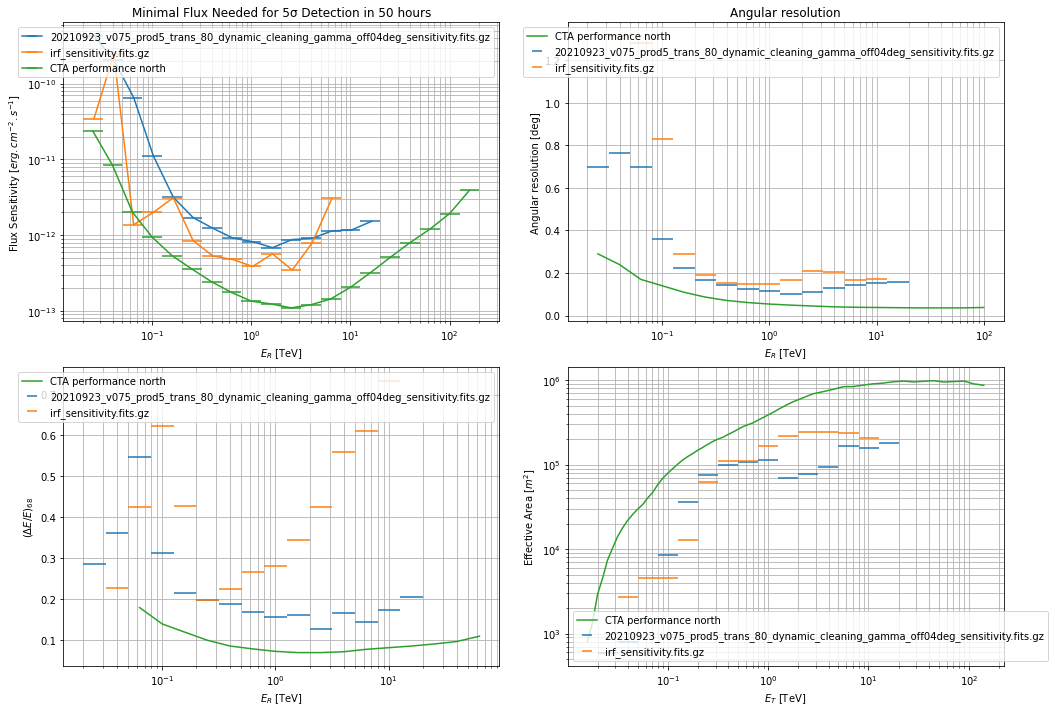

In [4]:
compare_filelist = [lstchain_v075_IRF, school_created_IRF]

plot_comparison(compare_filelist, outfile='./sensitivity_v075_vs_analysis-school.png', cta_north=True)

#### Or you can use directly the entry point

In [ ]:
!lstmcpipe_compare_irfs -h

In [ ]:
# Or using the lstchain entry point
!lstmcpipe_compare_irfs -f $lstchain_v075_IRF $school_created_IRF --add-cta-north -o sensitivity_v075_vs_analysis-school.png

In [ ]:
!ls